In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data_path = os.getcwd()
train_data = np.loadtxt(data_path + "/mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "/mnist_test.csv", delimiter=",")

In [11]:
image_size = 28 # width and length
no_of_different_labels = 10 # 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size #784
print(test_data[:10]) #tüm satırları 10. sutunlarına kadar gösterir.
print(train_data[10,15]) 
print(train_data[10,:]) #10.satırı komple yazar

[[7. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [9. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]]
0.0
[  3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  42. 118.
 219. 166. 118. 118.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 103. 242. 254.
 254. 254. 254. 254.  66.   0.   0.   0.   0.   0.   0.   0

In [98]:
image = train_data[44, :]
print(image.ndim)
print(image.shape)

1
(785,)


In [99]:
image1 = image[1:] #ilk satırda sayılar gösterildiği için o hariç alıyoruz
print(image1.shape)

(784,)


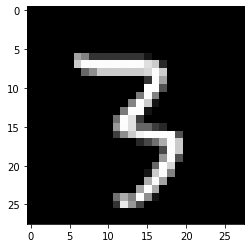

(2, (28, 28))

In [100]:
image2 = image1.reshape(28,28) # 28'e 28 olarak yeniden boyutlandırdık
plt.imshow(image2, cmap="gray")
plt.show()
plt.imsave('uc.png', image2)
image2.ndim, image2.shape

In [101]:
m,n = train_data.shape #60000 785 boyutunda
print(m,n)

60000 785


In [58]:
#train data içinde hangi rakamdan kaç tane var
def counterTrainData(k=0):  #default 0 buluyor ama sen teker teker rakamları yollayarak bulcaksın
    s=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
    return s

In [59]:
for i in range(10): #sırayla hepsini buluyoruz
    c = counterTrainData(i)
    print(i, " ", c)

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949


In [60]:
#rakamların bulunma olasılıkları
import math
def pdf1 (x, mu=0.0, sigma=1.0):
    x = float(x - mu)/ sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma

In [61]:
pdf1(5,1,3)

0.05467002489199788

In [62]:
def pdf2(x, mu=0.0, sigma=1.0): #eps diye bir şey var ama ne olduğunu anlamadım pdf1'den farkını da anlamadım
    eps = np.finfo(float).eps
    x = float(x - mu)/(sigma+eps)
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / (sigma+eps)

In [63]:
pdf2(5,1,3)

0.05467002489199788

In [70]:
def getMyMeanAndStd(k=0, l=350, m=10000):
    s=0 #kaç tane sıfır var onu tutacak
    t=0 #pixeldeki intersity değeri
    #k=>sınıfın yani digitin bilgisi
    #l=>location yani sınıfın pixel değeri
    for i in range(m):
        if(train_data[i,0] == k):
            s=s+1
            t=t+train_data[i, l+1] #l+1 olcak çünkü 0'da digit bilgisi var
            #digit_class = train_data[i,0]
            #top_left = train_data[i,1]
            #bottom_right = train_data[i,784]
    mean = t/s
    
    s,t = 0,0
    for i in range(m):
        if(train_data[i,0] == k):
            s=s+1
            diff=train_data[i, l+1] - mean
            t=t+diff*diff
    std = math.sqrt(t/(s-1))
    
    return mean, std

In [71]:
getMyMeanAndStd(1, 100)

(1.2972493345164153, 14.870650743271637)

In [72]:
test_value = 45
pdf1(test_value, 4.0, 2.0)

1.1059921901052853e-92

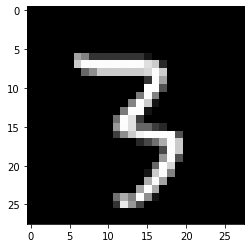

(2, (28, 28))

In [102]:
testImage = image2[:,:]
plt.imshow(testImage,cmap='gray')
plt.show()
testImage.ndim, testImage.shape

In [103]:
image3 = testImage.reshape(1,784)

In [104]:
myList = []
for i in range(10):
    pdf_t = 0
    for j in range(784):
        x = image3[0,j]
        mean, std = getMyMeanAndStd(i,j)
        pdf_deger = pdf2(x, mean, std)
        pdf_t += pdf_deger
    print(i, " : ", pdf_t)
    myList.append(pdf_t)

0  :  5.012726891949441e+17
1  :  6.018865622950038e+17
2  :  4.096421976216755e+17
3  :  4.491690763395561e+17
4  :  4.3838901850740685e+17
5  :  4.509657526449143e+17
6  :  4.797125735306456e+17
7  :  4.797125735306456e+17
8  :  4.904926313627949e+17
9  :  5.0306936550030234e+17


In [105]:
max(myList)

6.018865622950038e+17

In [106]:
m=len(myList)
maxNumber = 0
for i in range(m):
    if(maxNumber < myList[i]):
        maxNumber = myList[i]
print(maxNumber)

6.018865622950038e+17
